In [13]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
import pickle

# Dataset

In [2]:
URL = "https://github.com/ageron/handson-ml2/blob/master/datasets/housing/housing.csv?raw=true"
df = pd.read_csv(URL)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#Data Analysis and Vizualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


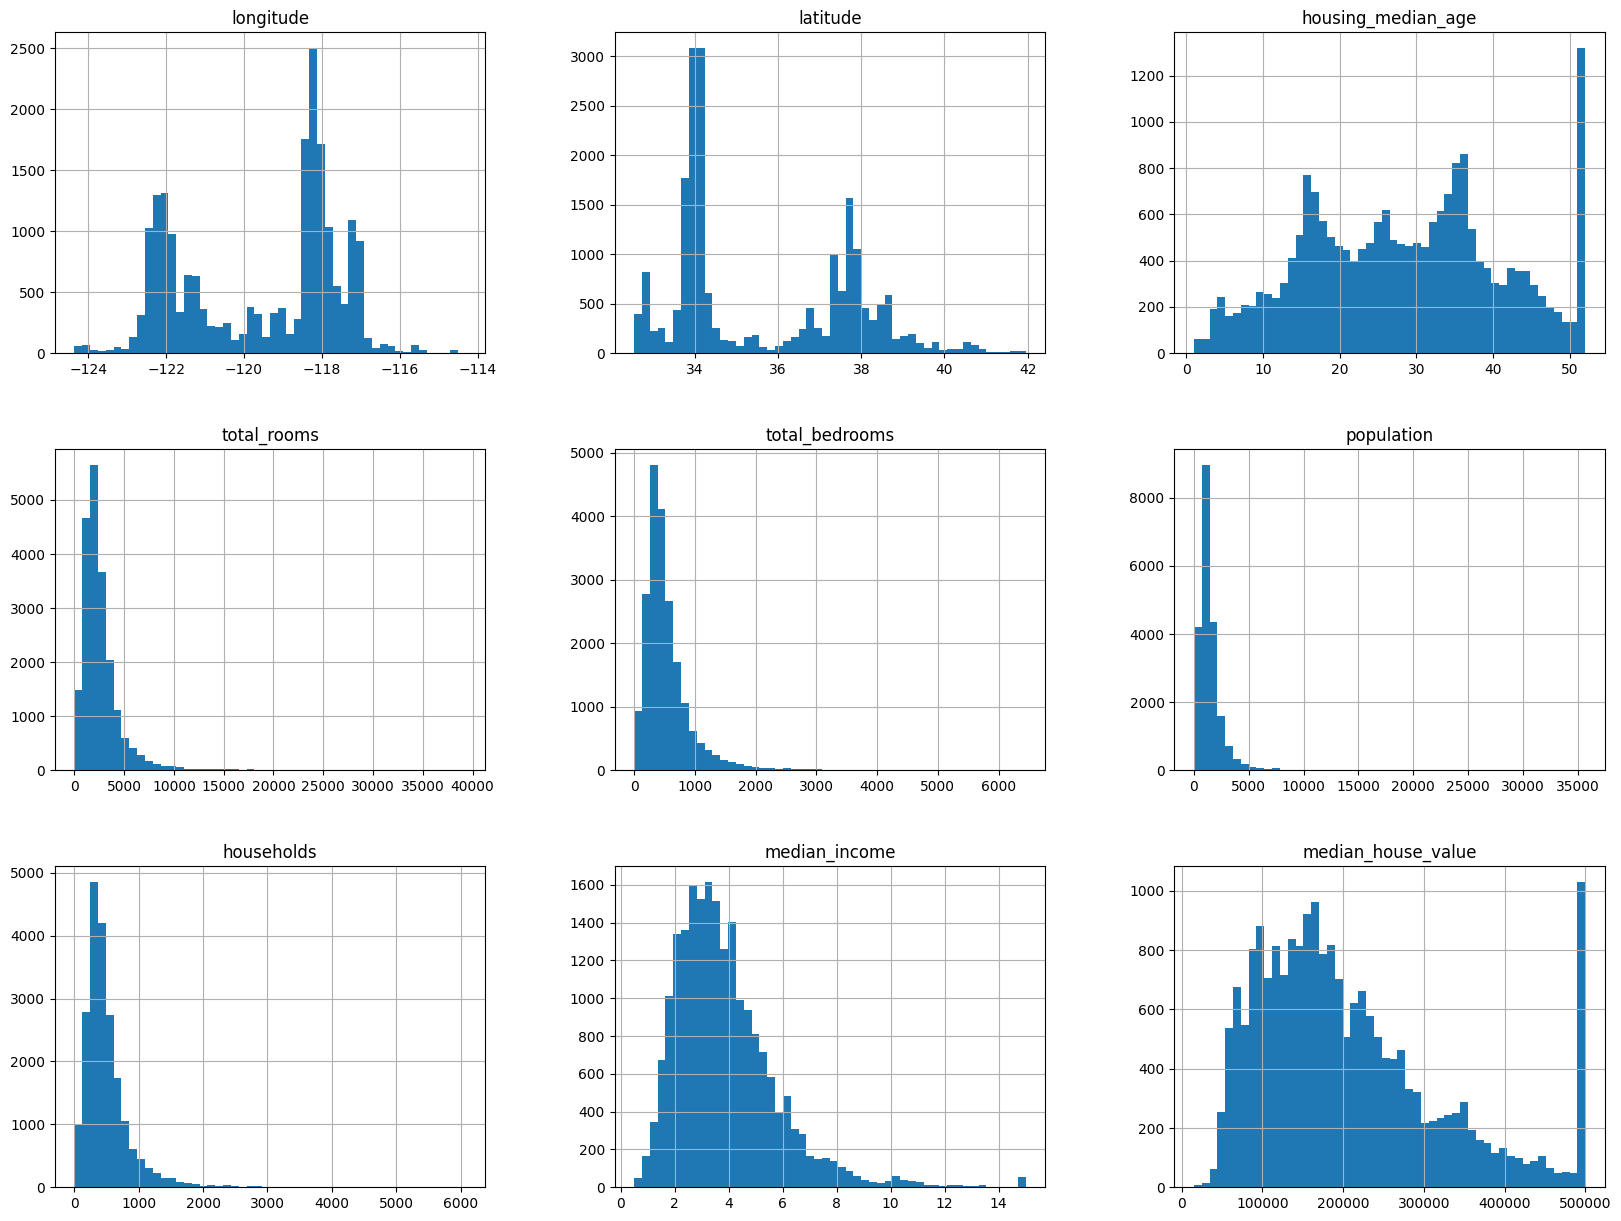

In [6]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [9]:
test_set.shape

(4128, 10)

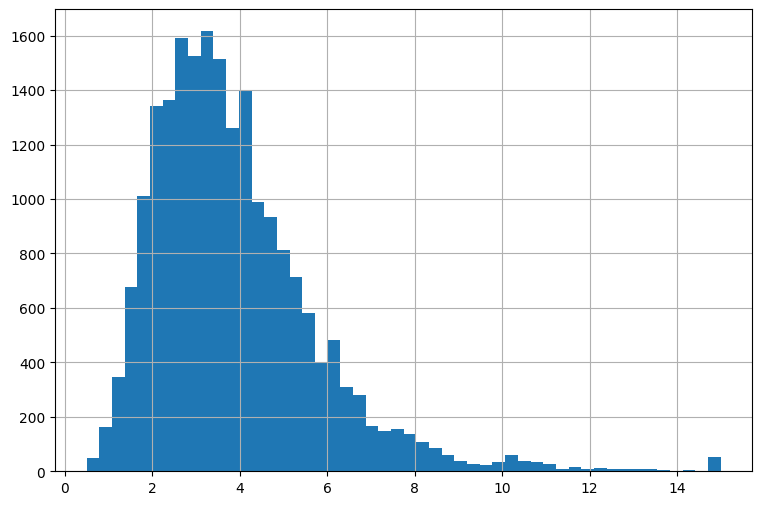

In [10]:
%matplotlib inline
df['median_income'].hist(bins=50, figsize=(9,6))
plt.show()

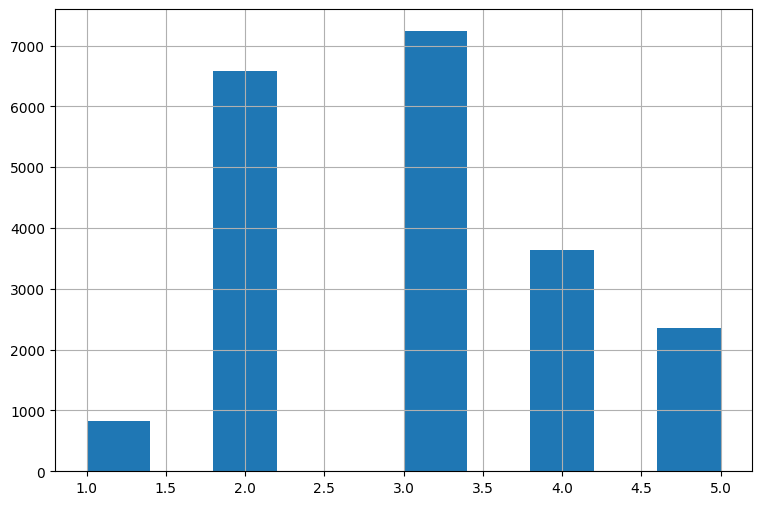

In [11]:
df['income_cat'] = pd.cut(df['median_income'], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])
df['income_cat'].hist(figsize=(9,6))
plt.show()

In [14]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df,df['income_cat']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [15]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

In [16]:
housing = strat_train_set.copy()

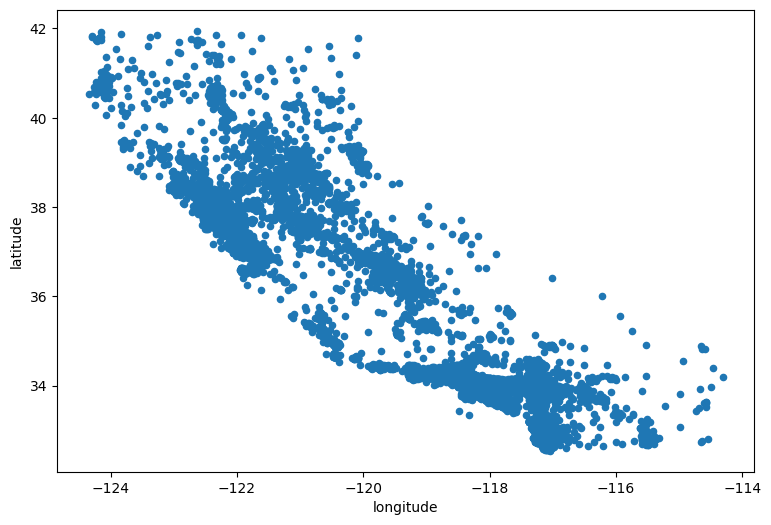

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(9,6))
plt.show()

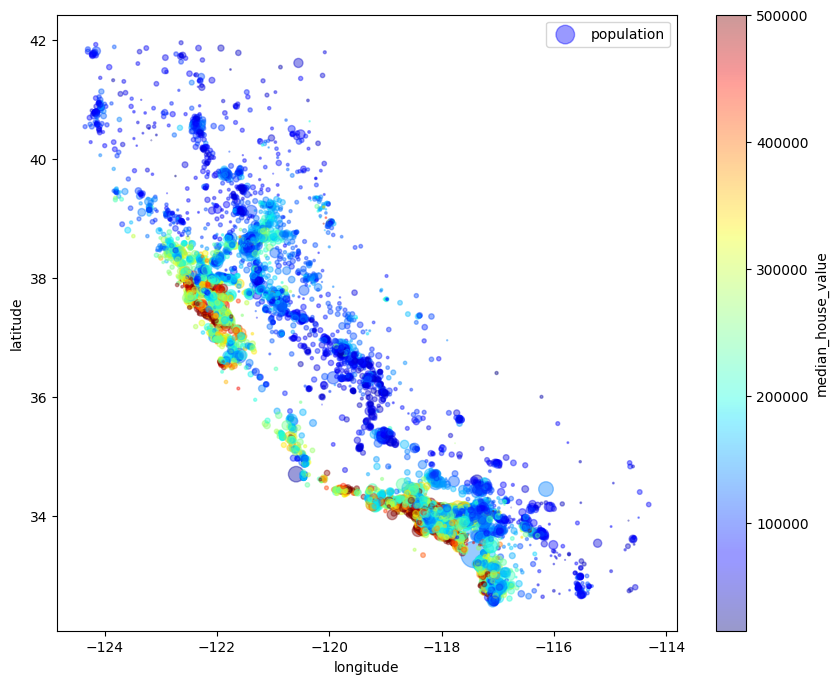

In [18]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing['population']/100,
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    figsize=(10,8)
)
plt.show()

In [20]:
numerical_housing = housing.select_dtypes(include=[np.number])
correlation_matrix = numerical_housing.corr()
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


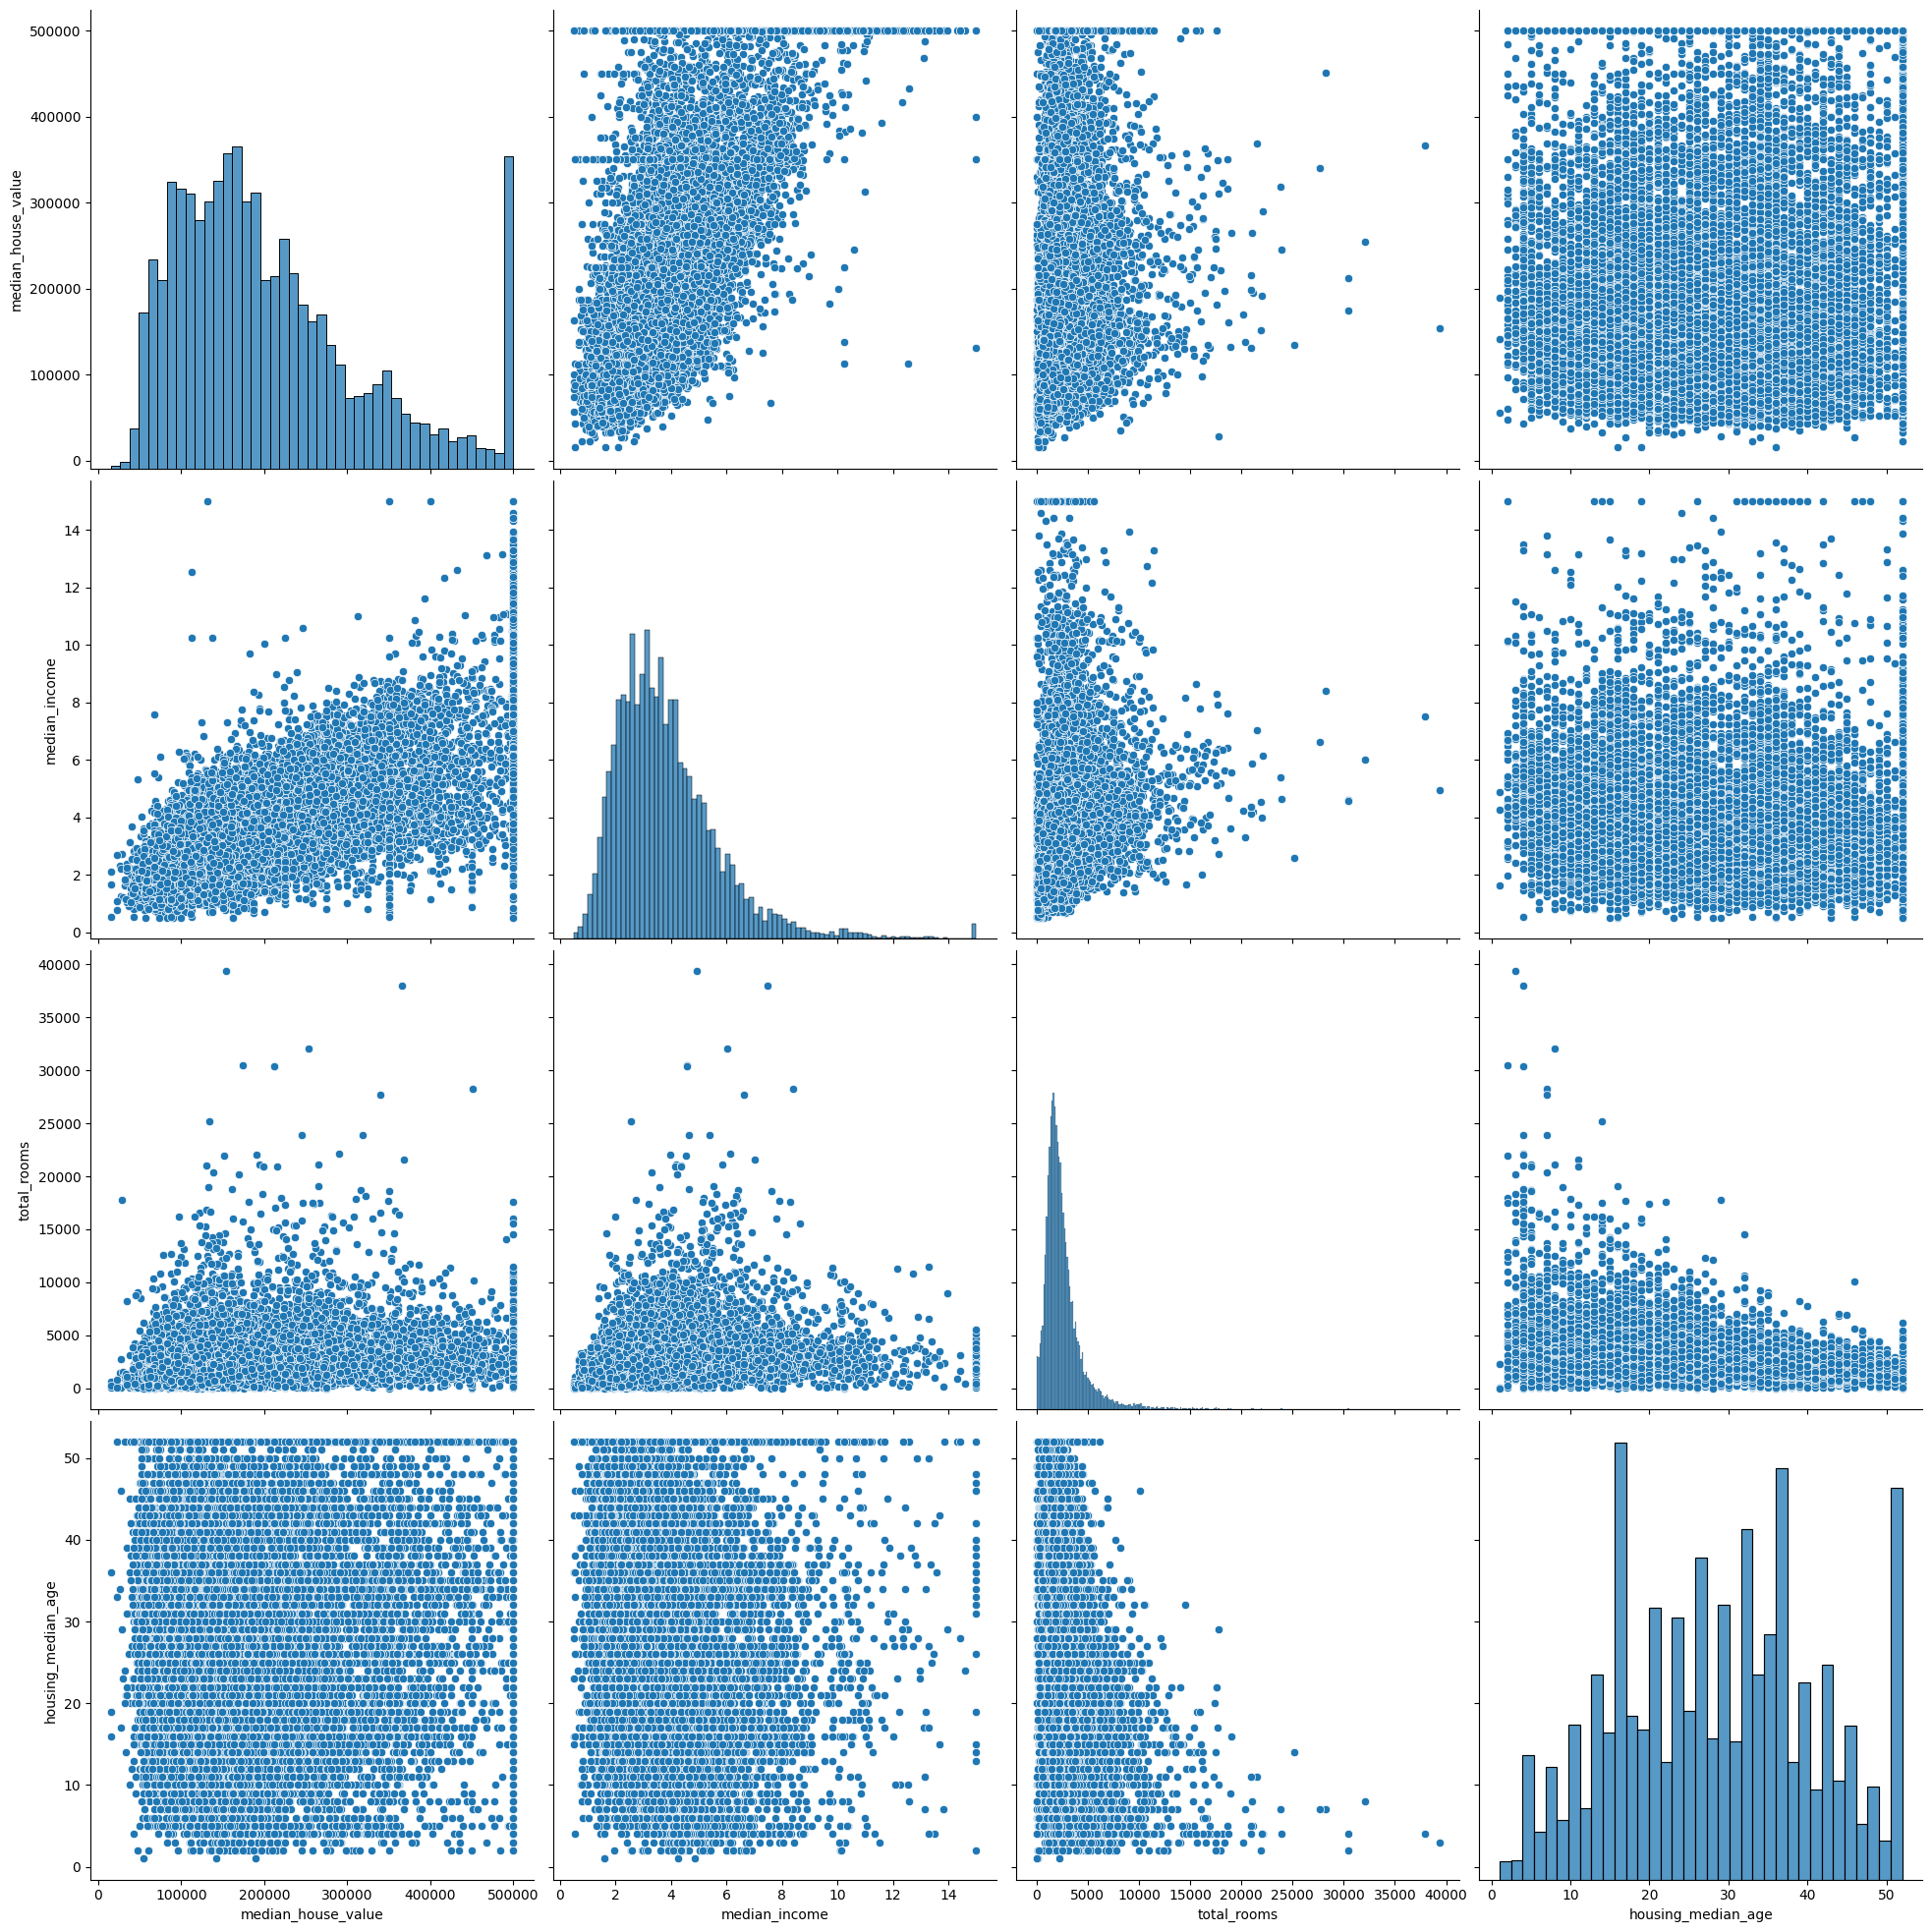

In [21]:
cols = ['median_house_value','median_income','total_rooms','housing_median_age']
sns.pairplot(housing[cols], height=5)
plt.show()

In [22]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [24]:
numerical_housing = housing.select_dtypes(include=[np.number])
correlation_matrix = numerical_housing.corr()
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


In [25]:
X_train = train_set.drop("median_house_value", axis=1)
y = train_set["median_house_value"].copy()

X_num = X_train.drop("ocean_proximity", axis=1)

# Build a pipeline

In [26]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # bizni funksiyamiz faqat transformer. estimator emas
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room: # add_bedrooms_per_room ustuni ixtiyoriy bo'ladi
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# For numeric columns

In [27]:
num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room = True)),
          ('std_scaler', StandardScaler())
])

# For text columns

In [28]:
num_attribs = list(X_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [29]:
X_prepared = full_pipeline.fit_transform(X_train)

# Machine Learning

### LinearRegression

In [35]:
LR_model = LinearRegression()
LR_model.fit(X_prepared, y)

LinearRegression()

In [36]:
test_data = X_train.sample(5)
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
9169,-118.61,34.59,5.0,4028.0,896.0,2062.0,826.0,4.0579,INLAND
7976,-118.20,33.87,36.0,1554.0,273.0,974.0,264.0,4.2135,<1H OCEAN
16905,-122.35,37.58,26.0,854.0,246.0,396.0,231.0,2.8393,NEAR OCEAN
8974,-118.41,34.01,26.0,2503.0,449.0,1218.0,426.0,5.3683,<1H OCEAN
8299,-118.14,33.77,52.0,2208.0,409.0,791.0,408.0,5.8408,NEAR OCEAN


In [37]:
test_label = y.loc[test_data.index]
test_label

,median_house_value
9169,167100.0
7976,161400.0
16905,375000.0
8974,500001.0
8299,500000.0


In [38]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 0.48478956, -0.4929088 , -1.87335854,  0.63736199,  0.85324086,
         0.55895754,  0.85577525,  0.09302719, -0.23403891, -0.05187189,
         0.16527547,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.6892179 , -0.82989269,  0.58654547, -0.50032849, -0.63365249,
        -0.39792812, -0.61945908,  0.17473974,  0.18897002,  0.05116709,
        -0.64114447,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.37999575,  0.90651045, -0.20697195, -0.8222296 , -0.69809249,
        -0.90627363, -0.70608316, -0.54691441, -0.72812945, -0.11941859,
         1.29666353,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.5845107 , -0.76436805, -0.20697195, -0.06392256, -0.21359915,
        -0.18333244, -0.1942136 ,  0.78117709,  0.18445581, -0.0205388 ,
        -0.5771881 ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.71913424, -0.87669601,  1

In [39]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([182781.79252083, 226667.19678573, 222829.30451003, 278444.42352501,
       343275.07867008])

In [40]:
pd.DataFrame({'Predict':predicted_data, 'Original Price': test_label})

,Predict,Original Price
9169,182781.792521,167100.0
7976,226667.196786,161400.0
16905,222829.304510,375000.0
8974,278444.423525,500001.0
8299,343275.078670,500000.0


# Model evaluation

In [41]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


In [42]:
X_test = test_set.drop('median_house_value', axis=1)
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,INLAND


In [43]:
y_test = test_set['median_house_value'].copy()
y_test

,median_house_value
20046,47700.0
3024,45800.0
15663,500001.0
20484,218600.0
9814,278000.0
...,...
15362,263300.0
16623,266800.0
18086,500001.0
2144,72300.0


In [44]:
X_test_prepared = full_pipeline.transform(X_test)

In [45]:
y_predicted = LR_model.predict(X_test_prepared)

##### Root Mean Squared Error (RMSE)

In [ ]:
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

72701.32600762138


#### Mean Absolute Error (MAE)

In [49]:
license_mse = mean_absolute_error(y_test, y_predicted)
license_rmse = np.sqrt(license_mse)
print(license_rmse)

225.6074899797008


### DecisionTree

In [50]:
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X_prepared, y)

DecisionTreeRegressor()

In [51]:
y_predicted = Tree_model.predict(X_test_prepared)

##### Root Mean Squared Error (RMSE)

In [52]:
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

72480.20476179029


#### Mean Absolute Error (MAE)

In [53]:
license_mse = mean_absolute_error(y_test, y_predicted)
license_rmse = np.sqrt(license_mse)
print(license_rmse)

210.2456688711322


# RandomForest

In [54]:
RF_model = RandomForestRegressor()
RF_model.fit(X_prepared, y)

RandomForestRegressor()

In [55]:
y_predicted = RF_model.predict(X_test_prepared)

##### Root Mean Squared Error (RMSE)

In [56]:
lin_mse = mean_squared_error(y_test, y_predicted)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

49795.87617998584


#### Mean Absolute Error (MAE)

In [57]:
license_mse = mean_absolute_error(y_test, y_predicted)
license_rmse = np.sqrt(license_mse)
print(license_rmse)

179.26688636768677


#Cross-Validation

In [59]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"].copy()

X_prepared = full_pipeline.transform(X)

In [60]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [61]:
scores = cross_val_score(LR_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [62]:
scores = cross_val_score(Tree_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [119469.71478391  72303.56650396  83690.57985263  76986.37984745
  89876.06095311  78018.95359291  69454.64236985  98816.6070023
  93627.25023831  73666.19487836]
Mean: 85590.99500227813
Std.dev: 14559.3713340222


In [63]:
scores = cross_val_score(RF_model, X_prepared, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)
display_scores(LR_rmse_scores)

Scores: [95642.96561589 47857.194789   65288.25192309 56488.79545433
 61033.75469369 59679.85498588 46411.9976765  79664.12723322
 74417.85727443 49281.7746184 ]
Mean: 63576.65742644294
Std.dev: 14918.029061813453


#Model Save

In [64]:
filename = 'Predict House Prices.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)